In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [3]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

In [5]:
#check null values
data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]>

In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
2377,spam,YES! The only place in town to meet exciting a...
622,ham,MAKE SURE ALEX KNOWS HIS BIRTHDAY IS OVER IN F...
467,ham,When are you going to ride your bike?
1881,ham,Ok.. ÌÏ finishing soon?
3192,ham,I will lick up every drop :) are you ready to ...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
data['target'] = encoder.fit_transform(data['target'])

In [14]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# check for duplicate values
data.duplicated().sum()

403

In [16]:
# remove duplicates
data =data.drop_duplicates(keep='first')

In [17]:
data.duplicated().sum()

0

In [18]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

**Exploratory data analysis**

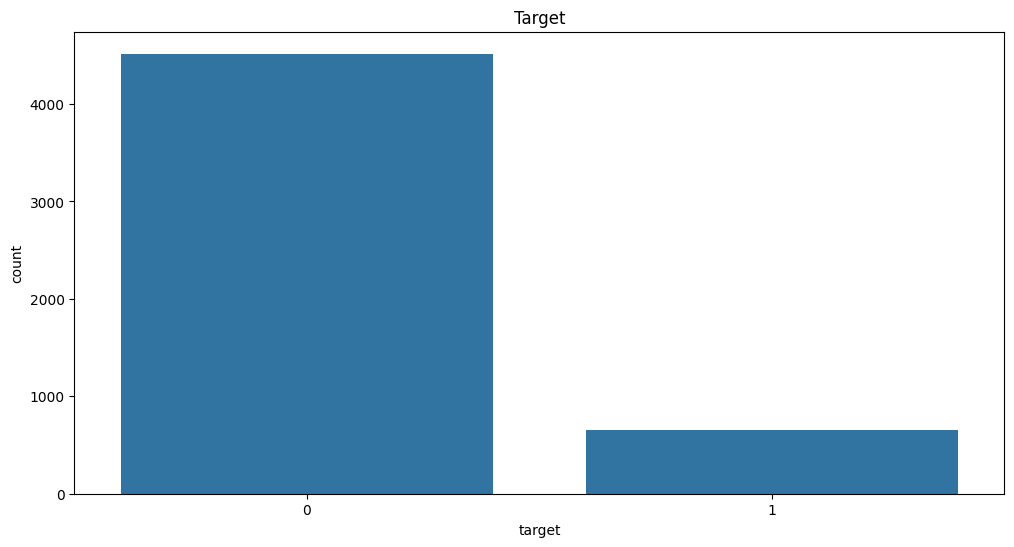

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='target',  data=data)
plt.title('Target')
plt.show()

In [20]:
import nltk

In [21]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True


**Removing special characters, numbers, and punctuation**

In [23]:
import re

def clean_data(text):
  """
  This function cleans the text by removing special characters, numbers, and punctuation.

  Args:
    text: The string to clean.

  Returns:
    The cleaned string.
  """

  # Remove special characters
  text = re.sub(r'\W', ' ', text)

  # Remove numbers
  text = re.sub(r'\d', '', text)

  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)

  return text.strip()

In [24]:
text = "This is some text & special characters! and punctuation?."
cleaned_text = clean_data(text)
print(cleaned_text)

This is some text   special characters  and punctuation


**Converting Text into Lower Case**

In [25]:
data['text'] = data['text'].str.replace('[^a-zA-Z]', ' ')
data['text'] = data['text'].str.lower()

<ipython-input-25-2684edd0e3fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.replace('[^a-zA-Z]', ' ')
<ipython-input-25-2684edd0e3fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lower()


In [26]:
data.head()

,target,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


**Tokenize the text**

In [27]:
def tokenize_text(text):
    """
    This function takes in a string of text and returns a list of individual words.
    """
    return nltk.word_tokenize(text)

In [28]:
text = "Clean the data by removing any irrelevant information, such as special characters, numbers, and punctuation"
tokenized_text = tokenize_text(text)
print(tokenized_text)

['Clean', 'the', 'data', 'by', 'removing', 'any', 'irrelevant', 'information', ',', 'such', 'as', 'special', 'characters', ',', 'numbers', ',', 'and', 'punctuation']


In [29]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
data['transformed_text'] = data['text'].apply(lambda x: " ".join([word.lower() for word in re.findall(r'\w+', x) if word.lower() not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-29-55e1d76f9094>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(lambda x: " ".join([word.lower() for word in re.findall(r'\w+', x) if word.lower() not in stopwords]))


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

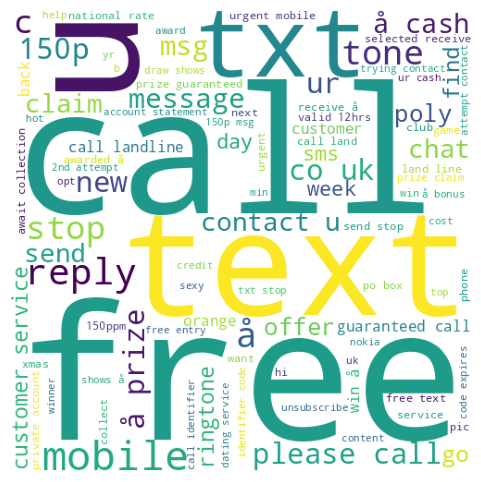

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [33]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

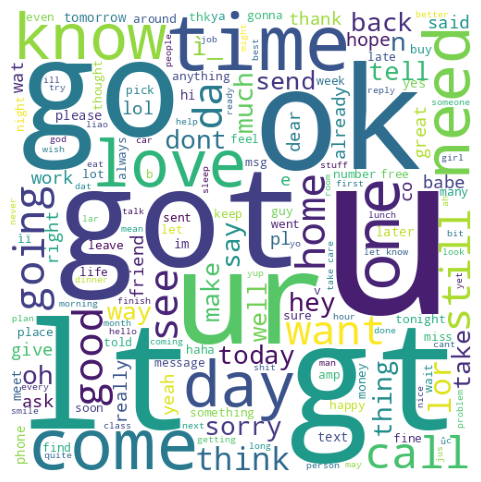

In [34]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [35]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['transformed_text'])
y = data['target']

**Train Test Split**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**MultiBnomialN**

In [37]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.965183752417795

In [40]:
from sklearn.metrics import confusion_matrix
Confusion_matrix=confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[889,   0],
       [ 36, 109]])

In [41]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

1.0

In [42]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.7517241379310344

**Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lg=LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = lg.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9439071566731141

In [47]:
Confusion_matrix=confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[883,   6],
       [ 52,  93]])

In [48]:
precision = precision_score(y_test, y_pred)
precision

0.9393939393939394

In [49]:
recall = recall_score(y_test, y_pred)
recall

0.6413793103448275

**Support Vector Classifier**

In [50]:
from sklearn.svm import SVC

In [51]:
svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [52]:
y_pred =svc.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.971953578336557

In [54]:
Confusion_matrix=confusion_matrix(y_test,y_pred)
Confusion_matrix

array([[888,   1],
       [ 28, 117]])

In [55]:
precision = precision_score(y_test, y_pred)
precision

0.9915254237288136

In [56]:
recall = recall_score(y_test, y_pred)
recall

0.8068965517241379